## 1. Prepare Data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## 2. Code

In [ ]:
class LinearRegression:

  def __init__(self, n_epochs=100, learning_rate = 0.01):
    """ Initialize the attributes """

    self.weights = None
    self.bias = None
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.epoch_error = 0
    self.epoch_errors = []
  
  def fit(self, X, y):
    """ Find the weights and biases given the training data """

    n_records = X.shape[0]
    n_features = X.shape[1]
    self.update_helper = 1/n_records
    self.weights = np.zeros(n_features)
    self.bias = 0
    self.sum_squared_error = 0

    for i in range(self.n_epochs):
      self.epoch_errors.append(self.epoch_error)
      self.weights, self.bias, self.epoch_error = self.update_weights(X, y, self.weights, self.bias)
    return self.weights, self.bias, self.epoch_errors
  
  def update_weights(self, X, y, weights, bias):
    """ The helper function of the fit() method that provide weights
    and biases for each epoch """

    sum_squared_error = 0
    predictions = np.dot(X, self.weights) + self.bias
    error = predictions - y
    updated_weights = (self.update_helper * np.dot(X.T, error)) * self.learning_rate
    updated_bias = (self.update_helper * np.sum(error)) * self.learning_rate
    mse = np.mean(error**2)
    return updated_weights, updated_bias, mse

  def predict(self, X_test):
    """ Given a set of test data records predict the y vector"""

    predictions = np.dot(X_test, self.weights) + self.bias
    return predictions
  
  def score(self, y, predictions):
    """ Find the accuracy of the predictions made by the predict method """

    return np.mean((y - predictions)**2)
  
  def feature_importance(self, X, y):
    """ Provide the feature importances on a graph"""

    self.weights, self.bias, self.epoch_errors = self.fit(X, y)
    weights_list = []
    feature_list = []
    f = 0
    for i in range(len(self.weights)):
      f += 1
      feature_list.append(f)
    for i in self.weights:
      weights_list.append(i)
    
    plt.scatter(feature_list, weights_list)
    plt.ylabel('Weights')
    plt.xlabel('Features')
    plt.show()


    

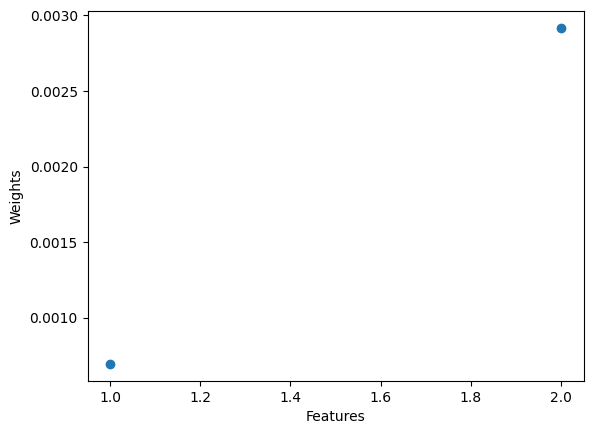

In [ ]:
obj = LinearRegression(1000,0.001)
obj.fit(X_train, y_train)
predictions = obj.predict(X_test)
accuracy = obj.score(y_test,predictions)
obj.feature_importance(X_train, y_train)